# Анализ данных парсинга


### Выгрузка данных и предварительная обработка

In [1]:
import pandas as pd
import re

In [2]:
def parse_data(filename):
    data = []
    current_product = {}
    
    with open(filename, 'r', encoding='utf-8') as file:
        for line in file:
            line = line.strip()
            if line.startswith('Ссылка на товар:'):
                if current_product:
                    data.append(current_product)
                    current_product = {}
                current_product['Ссылка на товар'] = line[len('Ссылка на товар:'):].strip()
            elif line.startswith('Название товара:'):
                current_product['Название товара'] = line[len('Название товара:'):].strip()
            elif line.startswith('Цена:'):
                match = re.search(r'\d+', line)
                if match:
                    current_product['Цена, руб'] = float(match.group())
            elif line.startswith('Пол:'):
                current_product['Пол'] = line[len('Пол:'):].strip()
            elif line.startswith('Зона применения:'):
                current_product['Зона применения'] = line[len('Зона применения:'):].strip()
            elif line.startswith('Тип/Консистенция:'):
                current_product['Тип/Консистенция'] = line[len('Тип/Консистенция:'):].strip()
            elif line.startswith('Процесс:'):
                current_product['Процесс'] = line[len('Процесс:'):].strip()
            elif line.startswith('Тип кожи:'):
                current_product['Тип кожи'] = line[len('Тип кожи:'):].strip()
            elif line.startswith('Питание:'):
                current_product['Питание'] = line[len('Питание:'):].strip()
            elif line.startswith('Фасовка (мл/грамм):'):
                match = re.search(r'\d+', line)
                if match:
                    current_product['Фасовка, мл/грамм'] = float(match.group())
            elif line.startswith('Бренд:'):
                current_product['Бренд'] = line[len('Бренд:'):].strip()
            elif line.startswith('Страна производства:'):
                current_product['Страна производства'] = line[len('Страна производства:'):].strip()
            elif line.startswith('Смягчение:'):
                current_product['Смягчение'] = line[len('Смягчение:'):].strip()
            elif line.startswith('Лифтинг:'):
                current_product['Лифтинг'] = line[len('Лифтинг:'):].strip()
            elif line.startswith('Вес:'):
                match = re.search(r'\d+(\.\d+)?', line)
                if match:
                    current_product['Вес, гр'] = float(match.group())
            elif line.startswith('Ширина:'):
                match = re.search(r'\d+(\.\d+)?', line)
                if match:
                    current_product['Ширина, см'] = float(match.group())
            elif line.startswith('Длина:'):
                match = re.search(r'\d+(\.\d+)?', line)
                if match:
                    current_product['Длина, см'] = float(match.group())
            elif line.startswith('Высота:'):
                match = re.search(r'\d+(\.\d+)?', line)
                if match:
                    current_product['Высота, см'] = float(match.group())
    
    if current_product:
        data.append(current_product)
    
    return pd.DataFrame(data)


df = parse_data('результаты.txt')

print(df.head())


                                     Ссылка на товар  \
0  https://www.r-ulybka.ru/catalog/goods/pitateln...   
1  https://www.r-ulybka.ru/catalog/goods/krem-dli...   
2  https://www.r-ulybka.ru/catalog/goods/gidrogel...   
3  https://www.r-ulybka.ru/catalog/goods/krem-shi...   
4  https://www.r-ulybka.ru/catalog/goods/krem-dli...   

                                     Название товара  Цена, руб         Пол  \
0  Питательный крем SVOBODA для лица для сухой ко...       95.0  для женщин   
1  Крем для лица Aravia Professional Beauty & car...      672.0  для женщин   
2  Гидрогелевые патчи для век WEIS Lazy Care с эк...      569.0  для женщин   
3  Крем широкого действия для кожи вокруг глаз Li...      639.0  для женщин   
4  Крем для лица Aravia Professional Beauty & car...      625.0  для женщин   

  Зона применения Тип/Консистенция     Процесс       Тип кожи  \
0        для лица             крем   для ухода     сухая кожа   
1        для лица       Нет данных  Нет данных  все типы к

В этом шаге я выгружаю данные парсинга из файла с результатами. Из данных я создаю таблицу.

Всего у меня имеется 18 колонок с данными, 6 из которых числовые, остальные категориальные. Каждая строка описывает отличительные черты товара из раздела уход за лицом магазина "Улыбка Радуги". 
Выбор магазина обусловлен тем, что именно этот магазин прислал мне рекламу в момент выбора магазина косметики парсинга к этому проекту. Но также, этот магазин является крупной сетью по продаже косметики, парфюмерии и бытовой химии. Под брендом «Улыбка радуги» работают более 1100 магазинов в 33 регионах России.

Таблица содержит следующие данные: Ссылка на товар, Название товара, Цена, Пол, Зона применения, Тип/Консистенция, Процесс, Тип кожи, Питание, Фасовка (мл/грамм), Бренд, Страна производства, Смягчение, Лифтинг, Вес, Ширина, Длина, Высота. Для всех числовых данных указаны единицы измерения, их можно посмотреть в табличке.

Мне кажется важным разобрать различия между весом товара и его фасовкой. Вес, эта та переменная которая включает в себя и сам продукт и его упаковку. А фасовка это значение чистого продукта.

In [3]:
# Просмотр информации о типах данных и наличии пропусков
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608 entries, 0 to 607
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Ссылка на товар      608 non-null    object 
 1   Название товара      608 non-null    object 
 2   Цена, руб            608 non-null    float64
 3   Пол                  608 non-null    object 
 4   Зона применения      608 non-null    object 
 5   Тип/Консистенция     608 non-null    object 
 6   Процесс              608 non-null    object 
 7   Тип кожи             608 non-null    object 
 8   Питание              608 non-null    object 
 9   Фасовка, мл/грамм    583 non-null    float64
 10  Бренд                608 non-null    object 
 11  Страна производства  608 non-null    object 
 12  Смягчение            608 non-null    object 
 13  Лифтинг              608 non-null    object 
 14  Вес, гр              608 non-null    float64
 15  Ширина, см           608 non-null    flo

In [4]:
# Проверка наличия пропущенных значений
print(df.isnull().sum())

# Процент пропущенных значений
print(df.isnull().mean() * 100)

Ссылка на товар         0
Название товара         0
Цена, руб               0
Пол                     0
Зона применения         0
Тип/Консистенция        0
Процесс                 0
Тип кожи                0
Питание                 0
Фасовка, мл/грамм      25
Бренд                   0
Страна производства     0
Смягчение               0
Лифтинг                 0
Вес, гр                 0
Ширина, см              0
Длина, см               0
Высота, см              0
dtype: int64
Ссылка на товар        0.000000
Название товара        0.000000
Цена, руб              0.000000
Пол                    0.000000
Зона применения        0.000000
Тип/Консистенция       0.000000
Процесс                0.000000
Тип кожи               0.000000
Питание                0.000000
Фасовка, мл/грамм      4.111842
Бренд                  0.000000
Страна производства    0.000000
Смягчение              0.000000
Лифтинг                0.000000
Вес, гр                0.000000
Ширина, см             0.000000
Длина, 

In [5]:
# Описательная статистика для количественных данных
print(df[['Цена, руб', 'Вес, гр', 'Ширина, см', 'Длина, см', 'Высота, см', 'Фасовка, мл/грамм']].describe())

        Цена, руб     Вес, гр  Ширина, см   Длина, см  Высота, см  \
count  608.000000  608.000000  608.000000  608.000000  608.000000   
mean   234.016447   88.750000    5.510855    6.560526   11.572862   
std    208.881866   74.938965    4.113903    3.947262    4.914592   
min      1.000000   10.000000    0.200000    0.200000    0.200000   
25%     79.000000   30.000000    3.000000    4.000000    7.500000   
50%    149.000000   63.500000    4.500000    5.850000   12.500000   
75%    329.000000  112.250000    7.000000    8.000000   15.500000   
max    999.000000  358.000000   20.500000   20.000000   21.000000   

       Фасовка, мл/грамм  
count         583.000000  
mean           55.614065  
std            56.530474  
min             1.000000  
25%            23.000000  
50%            40.000000  
75%            50.000000  
max           310.000000  


In [6]:
# Вычисляем среднее значение по параметру "Фасовка"
mean_fasovka = df['Фасовка, мл/грамм'].mean()

# Заполняем пропущенные значения средним
df['Фасовка, мл/грамм'] = df['Фасовка, мл/грамм'].fillna(mean_fasovka)

Далее я буду делать визуализации по имеющимся данным. Графиков будет много, иначе ничего не ясно, а подписи и анализ в основном в конце.

### Визуализация

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

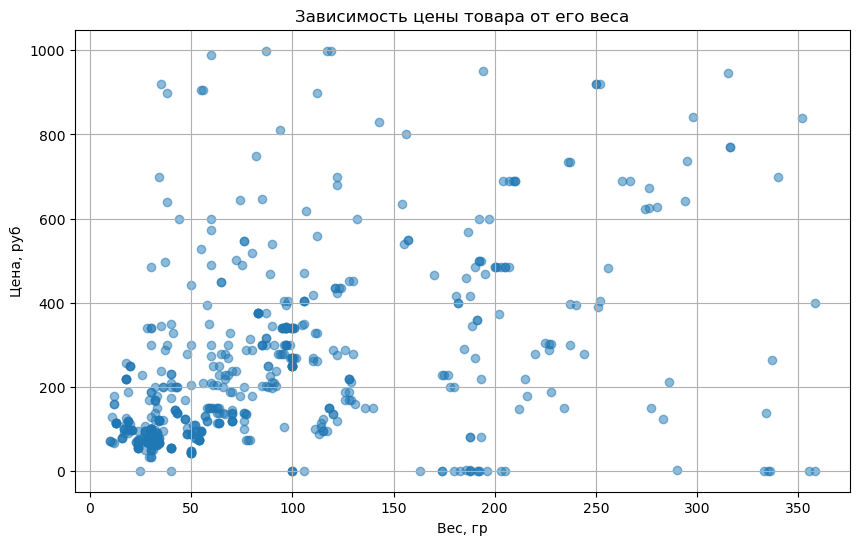

In [8]:
weights = df['Вес, гр']
prices = df['Цена, руб']

plt.figure(figsize=(10, 6))
plt.scatter(weights, prices, alpha=0.5)
plt.title('Зависимость цены товара от его веса')
plt.xlabel('Вес, гр')
plt.ylabel('Цена, руб')
plt.grid(True)
plt.show()

    Данные похоже имеют слабую/среднюю положительную связь

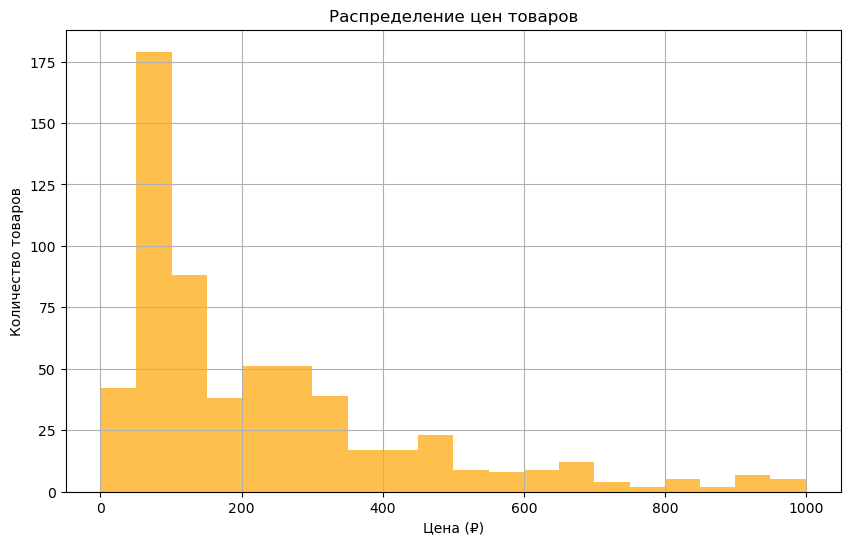

In [9]:
plt.figure(figsize=(10, 6))
plt.hist(prices, bins=20, color='orange', alpha=0.7)
plt.title('Распределение цен товаров')
plt.xlabel('Цена (₽)')
plt.ylabel('Количество товаров')
plt.grid(True)
plt.show()

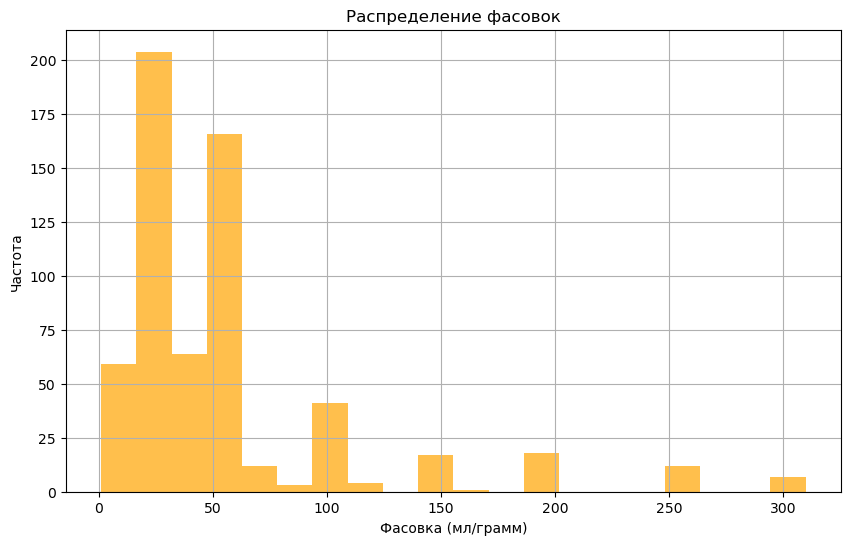

In [10]:
plt.figure(figsize=(10, 6))
plt.hist(df['Фасовка, мл/грамм'], bins=20, color='orange', alpha=0.7)
plt.title('Распределение фасовок')
plt.xlabel('Фасовка (мл/грамм)')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

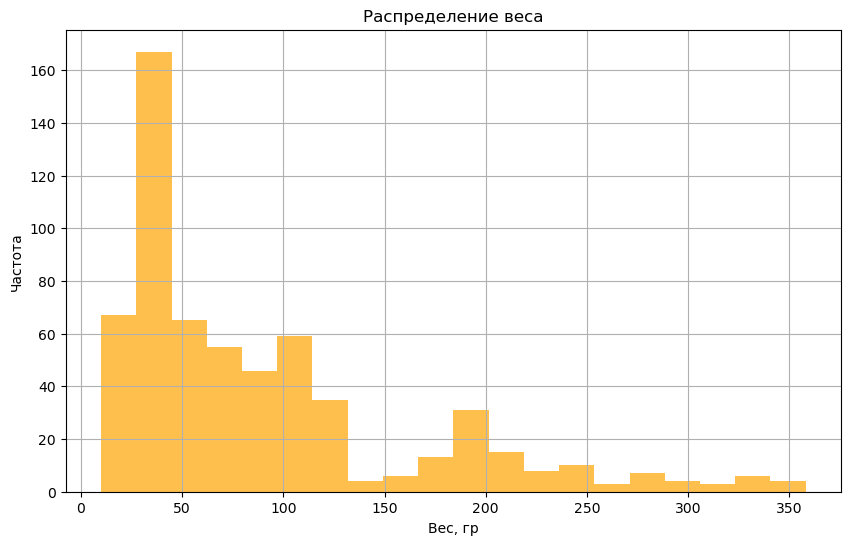

In [11]:
plt.figure(figsize=(10, 6))
plt.hist(df['Вес, гр'], bins=20, color='orange', alpha=0.7)
plt.title('Распределение веса')
plt.xlabel('Вес, гр')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

    По трем графикам с распределениями наглядно видно что самым типовым товаром в этом разделе является что-то небольшое 9то есть весом менее 50 грам, а фасовкой около 25 г) и ценой до 100 рублей. Скорее всего таким товаром будет маска для лица, так как они как раз подходят по это описание.

    На этом шаге я добавляю новую переменную для визуализации. А именно обьем в кубических сантиметрах. Эта пересенная помогает определить насколько велика упаковка товара

In [12]:
# Вычисляем объем для каждого товара и добавляем его в новый столбец
df['Объем, см^3'] = df['Ширина, см'] * df['Длина, см'] * df['Высота, см']

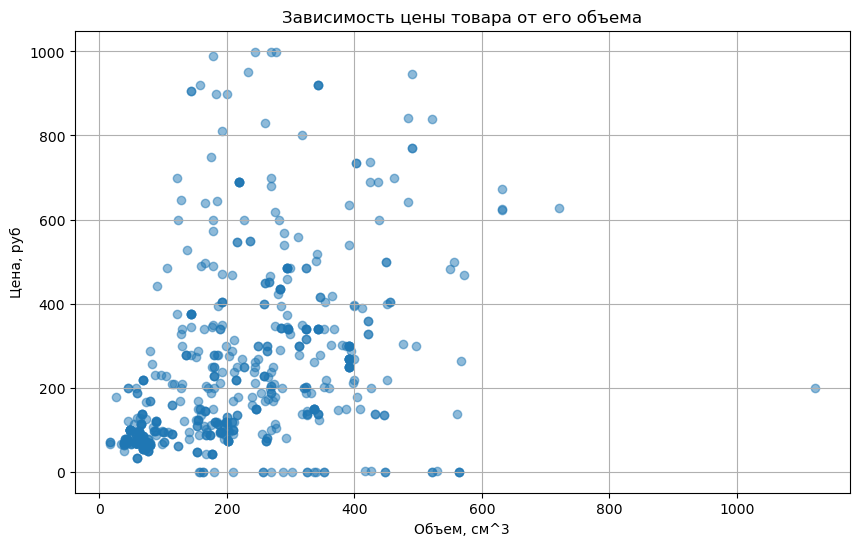

In [13]:
import matplotlib.pyplot as plt

volumes = df['Объем, см^3']
prices = df['Цена, руб']

plt.figure(figsize=(10, 6))
plt.scatter(volumes, prices, alpha=0.5)
plt.title('Зависимость цены товара от его объема')
plt.xlabel('Объем, см^3')
plt.ylabel('Цена, руб')
plt.grid(True)
plt.show()

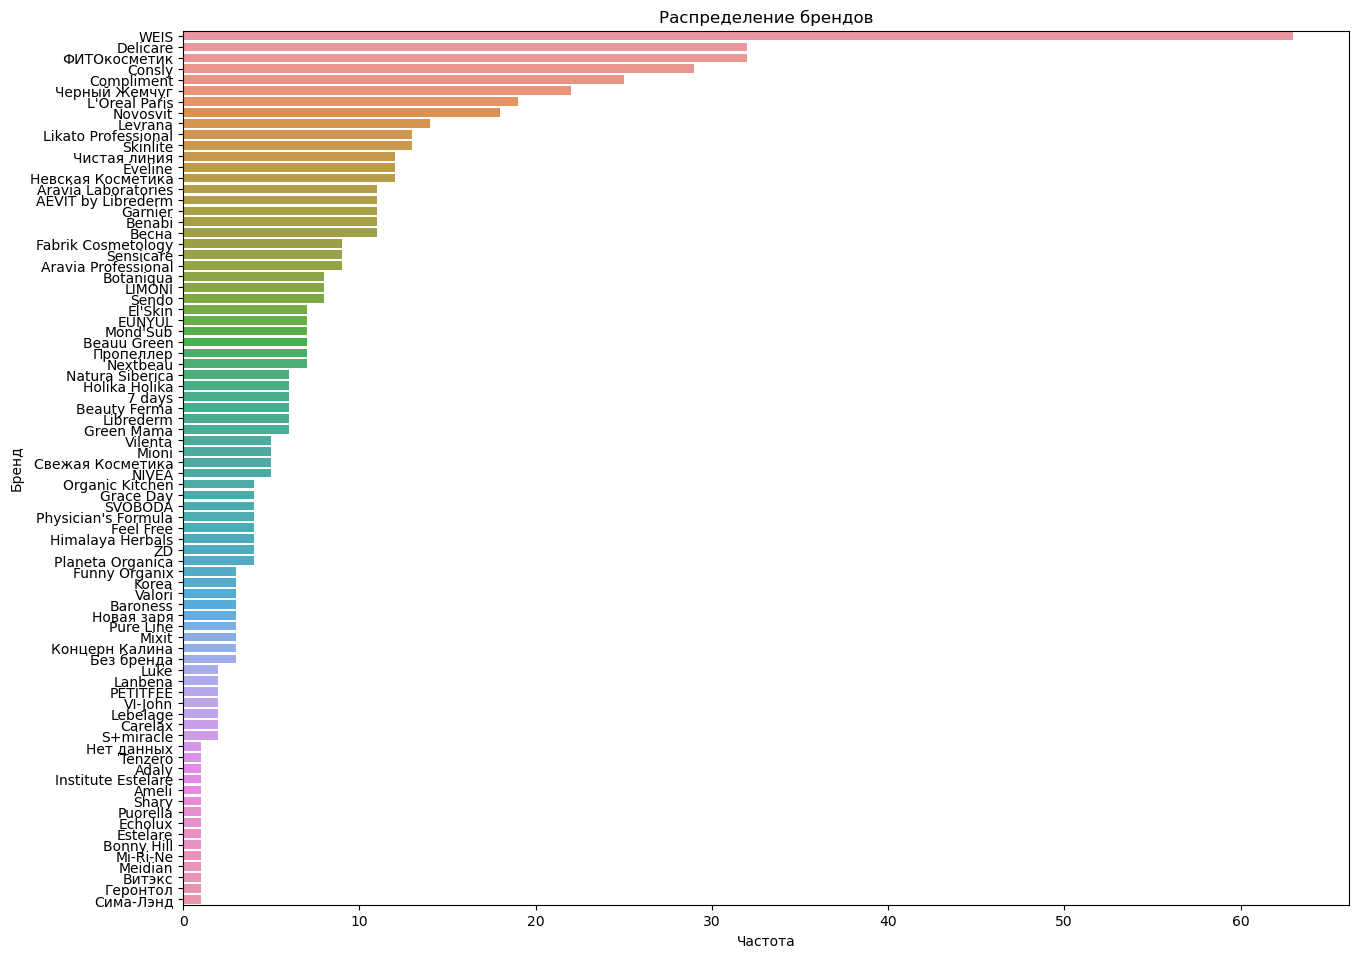

In [14]:
plt.figure(figsize=(12, 8))
sns.countplot(y='Бренд', data=df, order=df['Бренд'].value_counts().index)
plt.title('Распределение брендов')
plt.xlabel('Частота')
plt.ylabel('Бренд')
plt.tight_layout(pad=-5.0)  # Увеличиваем пространство между столбцами
plt.show()

    По этому графику мы можем определить от какого бренда представлено больше всего товаров по уходу за лицом в магазине Улыбка радуги. (кстати они производят масочки, так что не удивительно)

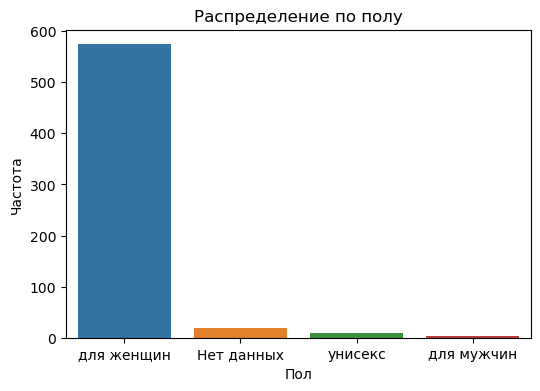

In [15]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Пол', data=df)
plt.title('Распределение по полу')
plt.xlabel('Пол')
plt.ylabel('Частота')
plt.show()

    По этому графику оказалось, что польшинство товаров предназначены для женщин (удивительно, хах)

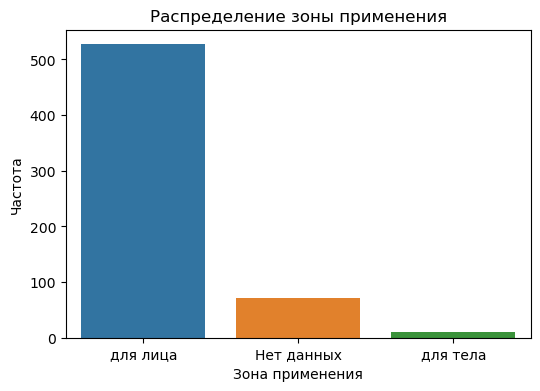

In [16]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Зона применения', data=df)
plt.title('Распределение зоны применения')
plt.xlabel('Зона применения')
plt.ylabel('Частота')
plt.show()

    Этот график тоже не очень информативен, он скорее нужен для понимания мне, что я сделала все правильно. Я же собирала товары из вкладки уход за лицом.Поэтому тут конечно есть товары которые могут быть использованы для всего тела, но их меньшинство.

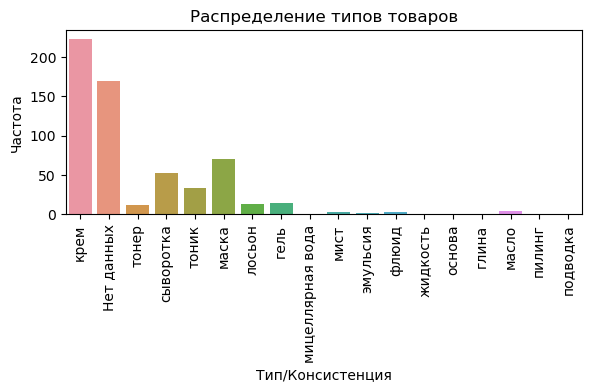

In [17]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Тип/Консистенция', data=df)
plt.title('Распределение типов товаров')
plt.xlabel('Тип/Консистенция')
plt.ylabel('Частота')
plt.xticks(rotation=90)  
plt.tight_layout(pad=1.0) 
plt.show()

    А судя по этому графику мы замечаем, что масок для лица значительно меньше чем кремов. Это означает что мой эмпирический опыт использования этого сайта неверен. И то что я говорила под описанием оранжевых графиков неверно. Либо большое количество масок находится в категории нет данных.

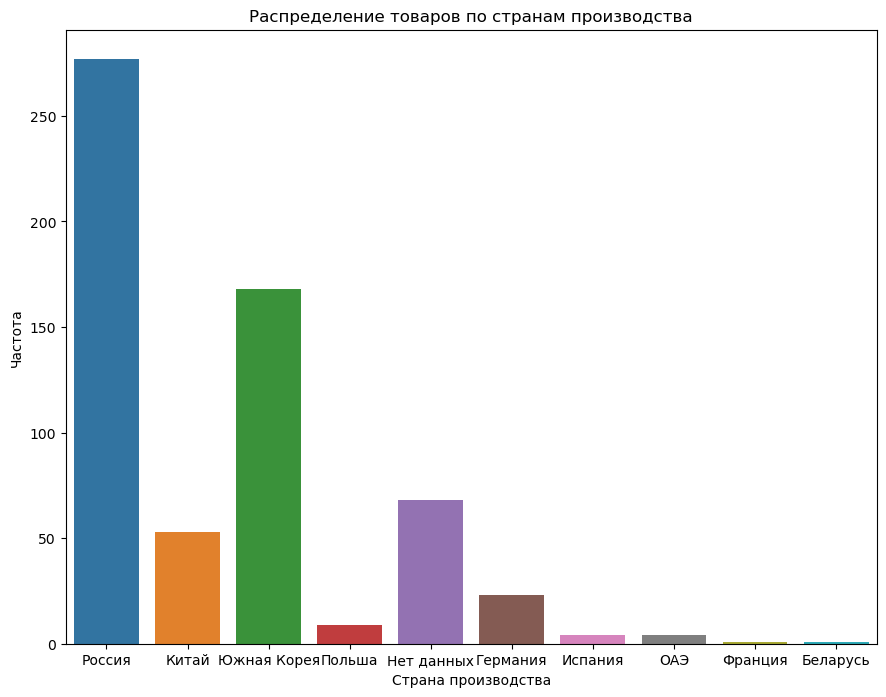

In [18]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Страна производства', data=df)
plt.title('Распределение товаров по странам производства')
plt.xlabel('Страна производства')
plt.ylabel('Частота')
plt.tight_layout(pad=-10.0)
plt.show()

    Второе мое удивление заключается в том, что невероятно мало товаров из Беларуси. Согласно моему эмпирическому опыту походов в этот магазин их должно было быть больше.

    Описывая сам график видно, что Россия занимает первое место по наличию товаров по уходу за лицом в данном магазине. Второе место занимает Южная Корея. Этот факт можно обьяснить высокой популярностью уходовой косметики из Кореи среди молодежи.

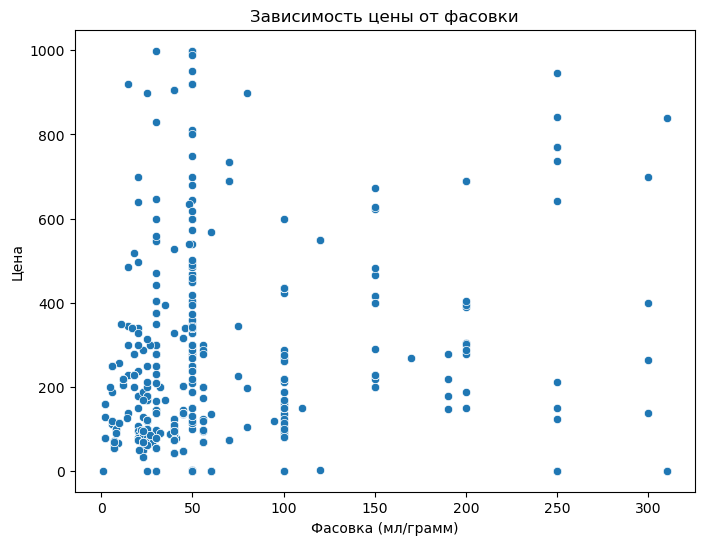

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Фасовка, мл/грамм', y='Цена, руб', data=df)
plt.title('Зависимость цены от фасовки')
plt.xlabel('Фасовка (мл/грамм)')
plt.ylabel('Цена')
plt.show()


    Здесь связь между показателями на вид вообще не прослеживается. Либо она очень слабая

### Создание допольнительных переменных

В части с визуализацией я уже создала переменную обьем. 

Для того чтобы узнать какой тип товара имеет наибольшую среднюю стоимость за мл/грамм создаем новую переменную. Этой переменной мы смотрим ценность самого продукта

In [20]:
import pandas as pd

# Убедимся, что значения в колонках 'Цена, руб' и 'Фасовка, мл/грамм' являются числовыми
df['Цена, руб'] = pd.to_numeric(df['Цена, руб'], errors='coerce')
df['Фасовка, мл/грамм'] = pd.to_numeric(df['Фасовка, мл/грамм'], errors='coerce')

# Вычисляем стоимость за мл/грамм
df['Стоимость за мл/грамм, руб'] = df['Цена, руб'] / df['Фасовка, мл/грамм']

# Проверяем данные
print(df[['Название товара', 'Цена, руб', 'Фасовка, мл/грамм', 'Стоимость за мл/грамм, руб']].head())


                                     Название товара  Цена, руб  \
0  Питательный крем SVOBODA для лица для сухой ко...       95.0   
1  Крем для лица Aravia Professional Beauty & car...      672.0   
2  Гидрогелевые патчи для век WEIS Lazy Care с эк...      569.0   
3  Крем широкого действия для кожи вокруг глаз Li...      639.0   
4  Крем для лица Aravia Professional Beauty & car...      625.0   

   Фасовка, мл/грамм  Стоимость за мл/грамм, руб  
0               40.0                    2.375000  
1              150.0                    4.480000  
2               60.0                    9.483333  
3               20.0                   31.950000  
4              150.0                    4.166667  


Для того чтобы узнать какой тип товара имеет наибольшую среднюю стоимость за см^3 создаем новую переменную. Этой переменной мы смотрим ценность самого продукта вместе с его упаковкой

In [21]:
df['Цена за кубический сантиметр'] = df['Цена, руб'] / df['Объем, см^3']

print(df[['Название товара', 'Цена за кубический сантиметр', 'Цена, руб', 'Фасовка, мл/грамм', 'Стоимость за мл/грамм, руб']].head())

                                     Название товара  \
0  Питательный крем SVOBODA для лица для сухой ко...   
1  Крем для лица Aravia Professional Beauty & car...   
2  Гидрогелевые патчи для век WEIS Lazy Care с эк...   
3  Крем широкого действия для кожи вокруг глаз Li...   
4  Крем для лица Aravia Professional Beauty & car...   

   Цена за кубический сантиметр  Цена, руб  Фасовка, мл/грамм  \
0                      0.678571       95.0               40.0   
1                      1.063712      672.0              150.0   
2                      1.968858      569.0               60.0   
3                      3.854971      639.0               20.0   
4                      0.989315      625.0              150.0   

   Стоимость за мл/грамм, руб  
0                    2.375000  
1                    4.480000  
2                    9.483333  
3                   31.950000  
4                    4.166667  


Здесь создается переменная, которая очень поможет мне с машинным обучением. Придумана она была позже, чтобы снизить ошибку модели.

Для того чтобы создать эту переменную я смотрю сколько в среднем стоят товары каждого бренда. Заметно, сто около половины брендов имеют среднюю цену до 300 рублей

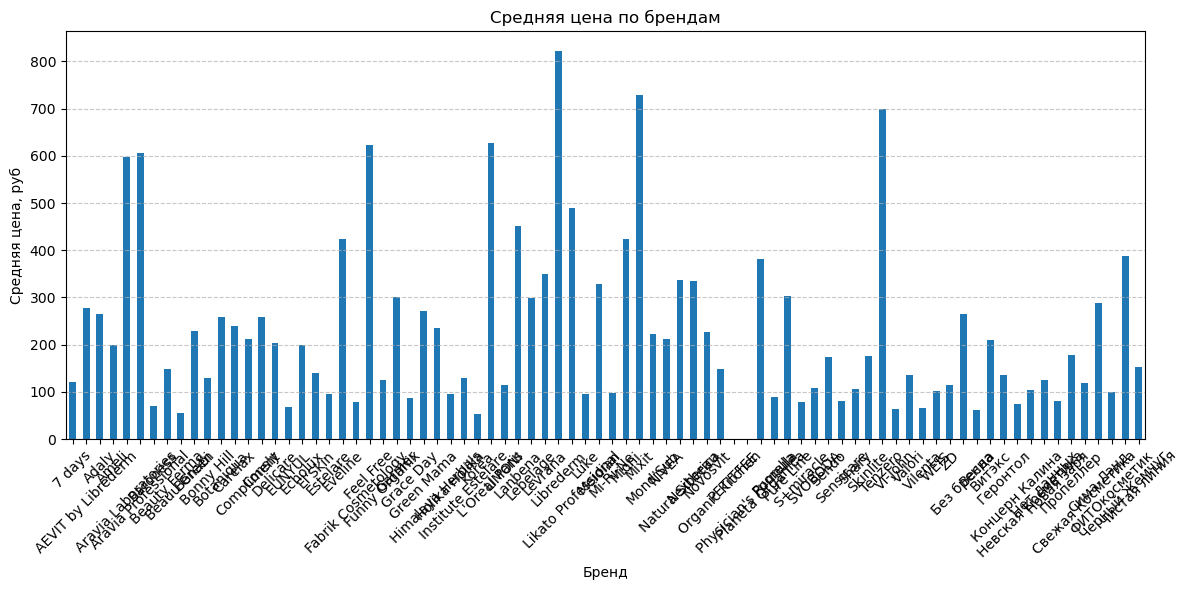

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Предположим, что у вас есть DataFrame df с данными, где есть столбцы 'Бренд' и 'Цена, руб'
# Предположим также, что данные уже загружены в DataFrame df

# Группируем данные по столбцу 'Бренд' и вычисляем среднее значение цены для каждого бренда
mean_price_by_brand = df.groupby('Бренд')['Цена, руб'].mean()

# Выводим график средних цен для каждого бренда
plt.figure(figsize=(12, 6))
mean_price_by_brand.plot(kind='bar')
plt.title('Средняя цена по брендам')
plt.xlabel('Бренд')
plt.ylabel('Средняя цена, руб')
plt.xticks(rotation=45)  # Поворачиваем подписи по оси x на 45 градусов для лучшей читаемости
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Добавляем сетку по оси y
plt.tight_layout()  # Автоматически подстраиваем размеры графика
plt.show()


In [23]:
# Предположим, что у вас есть DataFrame df с данными, где есть столбцы 'Бренд' и 'Цена, руб'
# Предположим также, что данные уже загружены в DataFrame df

# Вычисляем среднюю цену для каждого бренда
mean_price_by_brand = df.groupby('Бренд')['Цена, руб'].mean()

# Создаем переменную, где 1 обозначает "люксовый" товар, а 0 - нет
df['Люкс'] = df['Бренд'].map(lambda x: 1 if mean_price_by_brand.get(x, 0) > 300 else 0)

# Выводим первые несколько строк для проверки
print(df.head())


                                     Ссылка на товар  \
0  https://www.r-ulybka.ru/catalog/goods/pitateln...   
1  https://www.r-ulybka.ru/catalog/goods/krem-dli...   
2  https://www.r-ulybka.ru/catalog/goods/gidrogel...   
3  https://www.r-ulybka.ru/catalog/goods/krem-shi...   
4  https://www.r-ulybka.ru/catalog/goods/krem-dli...   

                                     Название товара  Цена, руб         Пол  \
0  Питательный крем SVOBODA для лица для сухой ко...       95.0  для женщин   
1  Крем для лица Aravia Professional Beauty & car...      672.0  для женщин   
2  Гидрогелевые патчи для век WEIS Lazy Care с эк...      569.0  для женщин   
3  Крем широкого действия для кожи вокруг глаз Li...      639.0  для женщин   
4  Крем для лица Aravia Professional Beauty & car...      625.0  для женщин   

  Зона применения Тип/Консистенция     Процесс       Тип кожи  \
0        для лица             крем   для ухода     сухая кожа   
1        для лица       Нет данных  Нет данных  все типы к

Здесь я кодирую 1 - как люкс, то есть средняя цена товара более 300 рублей. И 0 как не люкс.

### Проверка гипотез

#### Гипотеза 1 

Проверяем гипотезу о том, что средняя цена товара равна 208.
Уровень значимости = 5% 

H0: Средняя цена крема равна 208 рублям.

H1: Средняя цена крема не равна 208 рублям.

In [24]:
import pandas as pd
import numpy as np
from scipy import stats

# Предполагаемое среднее значение
mu = 208

# Фильтруем данные для кремов
cream_prices = df[df['Тип/Консистенция'] == 'крем']['Цена, руб']

# Выборочное среднее и стандартное отклонение для кремов
sample_mean = cream_prices.mean()
sample_std = cream_prices.std()
n = len(cream_prices)

# Уровень значимости
alpha = 0.05
z_crit = stats.norm.ppf(1 - alpha / 2)

# Z-статистика
z = (sample_mean - mu) / (sample_std / np.sqrt(n))

print(f"Среднеквадратическая ошибка (Z-статистика): {z}")

if abs(z) > z_crit:
    print("Ho отвергается")
else:
    print("Ho не отвергается")


Среднеквадратическая ошибка (Z-статистика): 6.22020904594548
Ho отвергается


#### Гипотеза 2

Проверим гипотезу о том, что крема и маски в среднем имеют разные цены. Для этого можно использовать t-тест для сравнения средних значений цен. 

In [25]:
from scipy.stats import ttest_ind

# Отфильтруем данные для масок и кремов
masks = df[df['Тип/Консистенция'] == 'маска']['Цена, руб']
creams = df[df['Тип/Консистенция'] == 'крем']['Цена, руб']

# Проверяем гипотезу о равенстве средних значений цен для масок и кремов
t_stat, p_value = ttest_ind(masks, creams)

# Выводим результаты теста
print("t-статистика:", t_stat)
print("p-значение:", p_value)
if p_value < 0.05:
    print("Результат статистически значим: средние цены различаются между масками и кремами")
else:
    print("Результат статистически незначим: средние цены не различаются между масками и кремами")


t-статистика: -6.1168489982264145
p-значение: 3.058939539612928e-09
Результат статистически значим: средние цены различаются между масками и кремами


Второй вариант проверки был предложен чатом ГПТ

In [26]:
import pandas as pd
from scipy.stats import mannwhitneyu

# Предположим, что df содержит столбцы 'Тип/Консистенция' и 'Цена, руб'
# Если ваши данные находятся в другом DataFrame, замените 'df' на нужное название

# Отфильтруем данные для масок и кремов
masks = df[df['Тип/Консистенция'] == 'маска']['Цена, руб']
creams = df[df['Тип/Консистенция'] == 'крем']['Цена, руб']

# Проверяем гипотезу о равенстве распределений цен для масок и кремов
stat, p_value = mannwhitneyu(masks, creams, alternative='two-sided')

# Выводим результаты теста
print("Статистика Манна-Уитни:", stat)
print("p-значение:", p_value)
if p_value < 0.05:
    print("Результат статистически значим: распределения цен различаются между масками и кремами")
else:
    print("Результат статистически незначим: распределения цен не различаются между масками и кремами")


Статистика Манна-Уитни: 4050.0
p-значение: 5.695514356910564e-10
Результат статистически значим: распределения цен различаются между масками и кремами


#### Гипотеза 3 

Проверим гипотезу о том, кремы являются продуктом для увлажения, а значит чаще встречаются для сухой кожи, чем для других типов кожи.

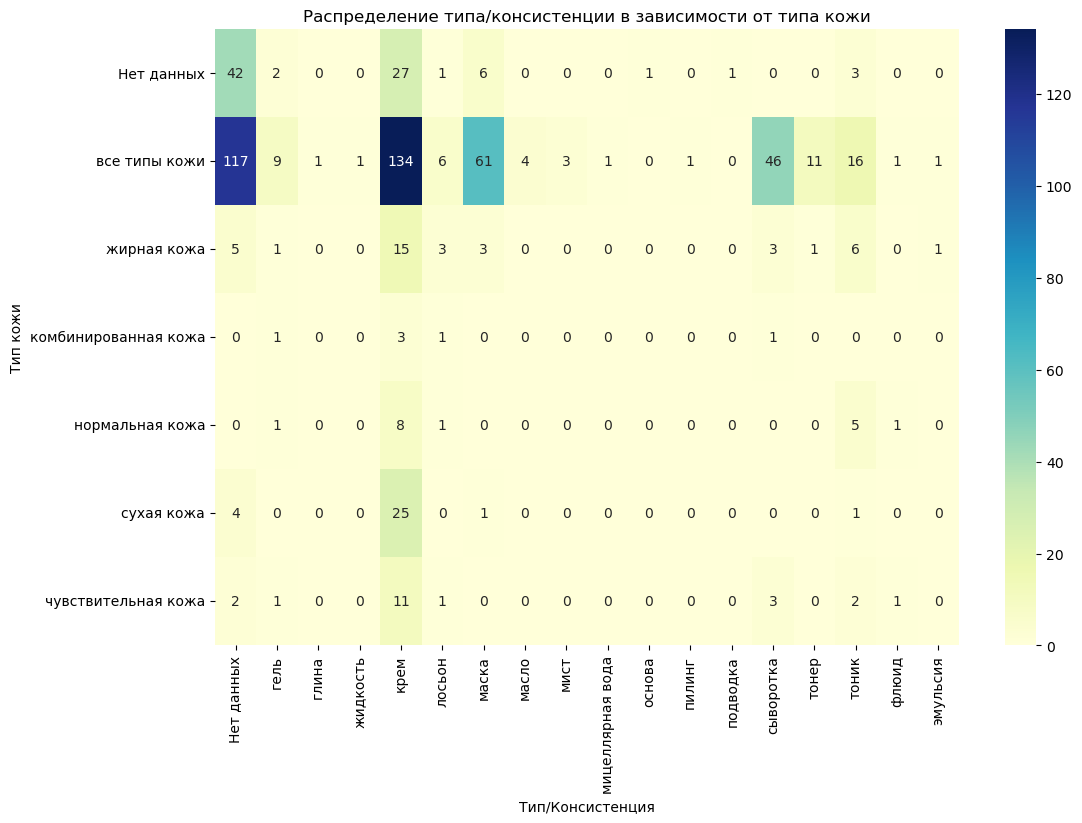

In [27]:
df_filtered = df.dropna(subset=['Тип кожи', 'Тип/Консистенция'])

pivot_table = pd.crosstab(df_filtered['Тип кожи'], df_filtered['Тип/Консистенция'])

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Распределение типа/консистенции в зависимости от типа кожи')
plt.xlabel('Тип/Консистенция')
plt.ylabel('Тип кожи')
plt.show()

В результате проверки выяснилось что крема чаще всего делают для всех типов кожи, но на втором месте находятся крема для сухой кожи

#### Гипотеза 4 

Корреляция Пирсона между между весом и ценой приближенно равна корреляции Пирсона между обьемом и ценой

In [28]:
from scipy.stats import pearsonr

corr, _ = pearsonr(df_filtered['Вес, гр'], df_filtered['Цена, руб'])
print(f'Коэффициент корреляции Пирсона между весом и ценой: {corr:.2f}')

corr, _ = pearsonr(df_filtered['Объем, см^3'], df_filtered['Цена, руб'])
print(f'Коэффициент корреляции Пирсона между обьемом и ценой: {corr:.2f}')

Коэффициент корреляции Пирсона между весом и ценой: 0.45
Коэффициент корреляции Пирсона между обьемом и ценой: 0.40


Гипотеза подтвердилась

### Машинное обучение

Цель: Предсказать цену товара на основе его характеристик.

Я собираюсь предсказывать цену товара, используя информацию о его характеристиках. Это может быть полезно для покупателей, которые хотят оценить стоимость товара до его покупки, а также для продавцов, чтобы адекватно ценить свои товары на рынке.

Для машинного обучения мне нужно предобработать данные и перевести категориальные значения в числовые.

In [29]:
df['Женский'] = df['Пол'].apply(lambda x: 'Да' if x == 'для женщин' else 'Нет')
print(df.head())


                                     Ссылка на товар  \
0  https://www.r-ulybka.ru/catalog/goods/pitateln...   
1  https://www.r-ulybka.ru/catalog/goods/krem-dli...   
2  https://www.r-ulybka.ru/catalog/goods/gidrogel...   
3  https://www.r-ulybka.ru/catalog/goods/krem-shi...   
4  https://www.r-ulybka.ru/catalog/goods/krem-dli...   

                                     Название товара  Цена, руб         Пол  \
0  Питательный крем SVOBODA для лица для сухой ко...       95.0  для женщин   
1  Крем для лица Aravia Professional Beauty & car...      672.0  для женщин   
2  Гидрогелевые патчи для век WEIS Lazy Care с эк...      569.0  для женщин   
3  Крем широкого действия для кожи вокруг глаз Li...      639.0  для женщин   
4  Крем для лица Aravia Professional Beauty & car...      625.0  для женщин   

  Зона применения Тип/Консистенция     Процесс       Тип кожи  \
0        для лица             крем   для ухода     сухая кожа   
1        для лица       Нет данных  Нет данных  все типы к

In [30]:
# Преобразуем категориальный признак "Женский" в числовой
df['Женский'] = df['Женский'].apply(lambda x: 1 if x == 'Да' else 0)
print(df.head())


                                     Ссылка на товар  \
0  https://www.r-ulybka.ru/catalog/goods/pitateln...   
1  https://www.r-ulybka.ru/catalog/goods/krem-dli...   
2  https://www.r-ulybka.ru/catalog/goods/gidrogel...   
3  https://www.r-ulybka.ru/catalog/goods/krem-shi...   
4  https://www.r-ulybka.ru/catalog/goods/krem-dli...   

                                     Название товара  Цена, руб         Пол  \
0  Питательный крем SVOBODA для лица для сухой ко...       95.0  для женщин   
1  Крем для лица Aravia Professional Beauty & car...      672.0  для женщин   
2  Гидрогелевые патчи для век WEIS Lazy Care с эк...      569.0  для женщин   
3  Крем широкого действия для кожи вокруг глаз Li...      639.0  для женщин   
4  Крем для лица Aravia Professional Beauty & car...      625.0  для женщин   

  Зона применения Тип/Консистенция     Процесс       Тип кожи  \
0        для лица             крем   для ухода     сухая кожа   
1        для лица       Нет данных  Нет данных  все типы к

In [31]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Преобразуем категориальный признак в числовой
df['Страна_код'] = label_encoder.fit_transform(df['Страна производства'])


classes = label_encoder.classes_

# Создаем словарь, где ключами будут числовые коды, а значениями - соответствующие им страны производства
country_code_mapping = {code: country for code, country in enumerate(classes)}

for code, country in country_code_mapping.items():
    print(f"Код {code} соответствует стране производства: {country}")


Код 0 соответствует стране производства: Беларусь
Код 1 соответствует стране производства: Германия
Код 2 соответствует стране производства: Испания
Код 3 соответствует стране производства: Китай
Код 4 соответствует стране производства: Нет данных
Код 5 соответствует стране производства: ОАЭ
Код 6 соответствует стране производства: Польша
Код 7 соответствует стране производства: Россия
Код 8 соответствует стране производства: Франция
Код 9 соответствует стране производства: Южная Корея


In [32]:
label_encoder = LabelEncoder()

# Преобразуем категориальную переменную "Тип кожи" в числовые значения
df['Тип_кожи_код'] = label_encoder.fit_transform(df['Тип кожи'])

# Получаем список уникальных значений категориального признака
classes = label_encoder.classes_

# Создаем словарь, где ключами будут числовые коды, а значениями - соответствующие им типы кожи
skin_type_code_mapping = {code: skin_type for code, skin_type in enumerate(classes)}

for code, skin_type in skin_type_code_mapping.items():
    print(f"Код {code} соответствует типу кожи: {skin_type}")


Код 0 соответствует типу кожи: Нет данных
Код 1 соответствует типу кожи: все типы кожи
Код 2 соответствует типу кожи: жирная кожа
Код 3 соответствует типу кожи: комбинированная кожа
Код 4 соответствует типу кожи: нормальная кожа
Код 5 соответствует типу кожи: сухая кожа
Код 6 соответствует типу кожи: чувствительная кожа


In [33]:
label_encoder_consistency = LabelEncoder()

# Преобразуем категориальную переменную "Тип/Консистенция" в числовые значения
df['Тип_консистенции_код'] = label_encoder_consistency.fit_transform(df['Тип/Консистенция'])

# Получаем список уникальных значений категориального признака
consistency_classes = label_encoder_consistency.classes_

# Создаем словарь, где ключами будут числовые коды, а значениями - соответствующие им типы консистенции
consistency_code_mapping = {code: consistency for code, consistency in enumerate(consistency_classes)}

for code, consistency in consistency_code_mapping.items():
    print(f"Код {code} соответствует типу консистенции: {consistency}")


Код 0 соответствует типу консистенции: Нет данных
Код 1 соответствует типу консистенции: гель
Код 2 соответствует типу консистенции: глина
Код 3 соответствует типу консистенции: жидкость
Код 4 соответствует типу консистенции: крем
Код 5 соответствует типу консистенции: лосьон
Код 6 соответствует типу консистенции: маска
Код 7 соответствует типу консистенции: масло
Код 8 соответствует типу консистенции: мист
Код 9 соответствует типу консистенции: мицеллярная вода
Код 10 соответствует типу консистенции: основа
Код 11 соответствует типу консистенции: пилинг
Код 12 соответствует типу консистенции: подводка
Код 13 соответствует типу консистенции: сыворотка
Код 14 соответствует типу консистенции: тонер
Код 15 соответствует типу консистенции: тоник
Код 16 соответствует типу консистенции: флюид
Код 17 соответствует типу консистенции: эмульсия


In [34]:
label_encoder_nutrition = LabelEncoder()

# Преобразуем категориальную переменную "Питание" в числовые значения
df['Питание_код'] = label_encoder_nutrition.fit_transform(df['Питание'])

# Получаем список уникальных значений категориального признака
nutrition_classes = label_encoder_nutrition.classes_

# Создаем словарь, где ключами будут числовые коды, а значениями - соответствующие им типы питания
nutrition_code_mapping = {code: nutrition for code, nutrition in enumerate(nutrition_classes)}

for code, nutrition in nutrition_code_mapping.items():
    print(f"Код {code} соответствует типу питания: {nutrition}")


Код 0 соответствует типу питания: Нет данных
Код 1 соответствует типу питания: питающий эффект


In [35]:
label_encoder_softening = LabelEncoder()

# Преобразуем категориальную переменную "Смягчение" в числовые значения
df['Смягчение_код'] = label_encoder_softening.fit_transform(df['Смягчение'])

# Получаем список уникальных значений категориального признака
softening_classes = label_encoder_softening.classes_

# Создаем словарь, где ключами будут числовые коды, а значениями - соответствующие им типы смягчения
softening_code_mapping = {code: softening for code, softening in enumerate(softening_classes)}

for code, softening in softening_code_mapping.items():
    print(f"Код {code} соответствует типу смягчения: {softening}")


Код 0 соответствует типу смягчения: Нет данных
Код 1 соответствует типу смягчения: смягчающий эффект


In [36]:
label_encoder_lifting = LabelEncoder()

# Преобразуем категориальную переменную "Лифтинг" в числовые значения
df['Лифтинг_код'] = label_encoder_lifting.fit_transform(df['Лифтинг'])

# Получаем список уникальных значений категориального признака
lifting_classes = label_encoder_lifting.classes_

# Создаем словарь, где ключами будут числовые коды, а значениями - соответствующие им типы лифтинга
lifting_code_mapping = {code: lifting for code, lifting in enumerate(lifting_classes)}

for code, lifting in lifting_code_mapping.items():
    print(f"Код {code} соответствует типу лифтинга: {lifting}")



Код 0 соответствует типу лифтинга: Нет данных
Код 1 соответствует типу лифтинга: лифтинг эффект


In [37]:
print(df.head())

                                     Ссылка на товар  \
0  https://www.r-ulybka.ru/catalog/goods/pitateln...   
1  https://www.r-ulybka.ru/catalog/goods/krem-dli...   
2  https://www.r-ulybka.ru/catalog/goods/gidrogel...   
3  https://www.r-ulybka.ru/catalog/goods/krem-shi...   
4  https://www.r-ulybka.ru/catalog/goods/krem-dli...   

                                     Название товара  Цена, руб         Пол  \
0  Питательный крем SVOBODA для лица для сухой ко...       95.0  для женщин   
1  Крем для лица Aravia Professional Beauty & car...      672.0  для женщин   
2  Гидрогелевые патчи для век WEIS Lazy Care с эк...      569.0  для женщин   
3  Крем широкого действия для кожи вокруг глаз Li...      639.0  для женщин   
4  Крем для лица Aravia Professional Beauty & car...      625.0  для женщин   

  Зона применения Тип/Консистенция     Процесс       Тип кожи  \
0        для лица             крем   для ухода     сухая кожа   
1        для лица       Нет данных  Нет данных  все типы к

In [38]:
print(df.columns.tolist())

['Ссылка на товар', 'Название товара', 'Цена, руб', 'Пол', 'Зона применения', 'Тип/Консистенция', 'Процесс', 'Тип кожи', 'Питание', 'Фасовка, мл/грамм', 'Бренд', 'Страна производства', 'Смягчение', 'Лифтинг', 'Вес, гр', 'Ширина, см', 'Длина, см', 'Высота, см', 'Объем, см^3', 'Стоимость за мл/грамм, руб', 'Цена за кубический сантиметр', 'Люкс', 'Женский', 'Страна_код', 'Тип_кожи_код', 'Тип_консистенции_код', 'Питание_код', 'Смягчение_код', 'Лифтинг_код']


Здесь я строю различные модели. Я построила линейную модель. Чат ГПТ предложил построить такие модели как Случайный лес и Градиентный бустинг

In [39]:
from sklearn.model_selection import train_test_split

# Определяем признаки и целевую переменную
X = df[['Женский', 'Страна_код', 'Тип_кожи_код', 'Тип_консистенции_код', 'Питание_код', 'Смягчение_код', 'Лифтинг_код', 'Фасовка, мл/грамм', 'Вес, гр', 'Ширина, см', 'Длина, см', 'Высота, см', 'Объем, см^3']]
y = df['Цена, руб']


In [40]:
from sklearn.impute import SimpleImputer

# Создаем объект SimpleImputer для заполнения пропущенных значений медианой
imputer = SimpleImputer(strategy='median')

# Применяем imputer к данным
X_imputed = imputer.fit_transform(X)

# Разделяем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)


Среднеквадратическая ошибка (Линейная регрессия): 17743.565572569383
Среднеквадратическая ошибка (Случайный лес): 9640.262956886601
Среднеквадратическая ошибка (Градиентный бустинг): 9951.188354090094


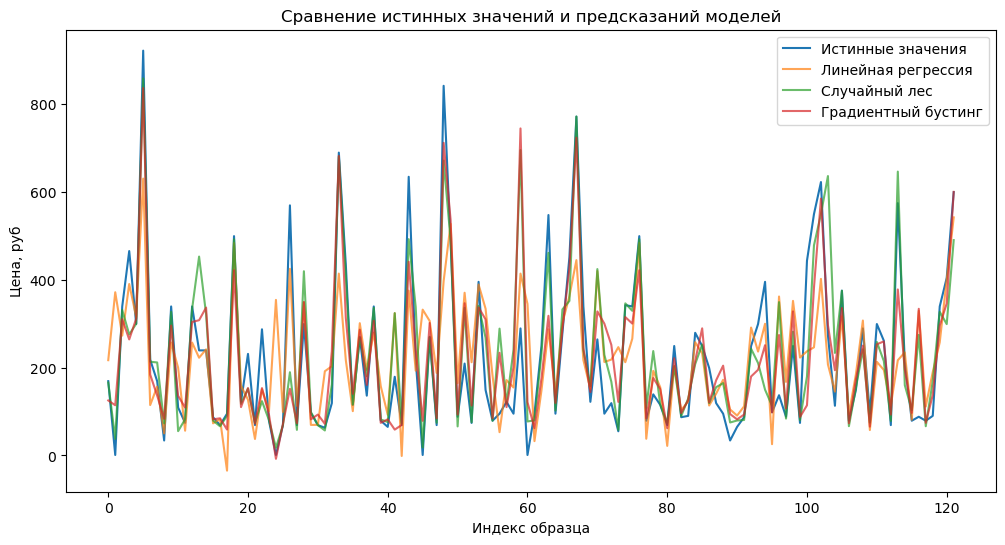

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Линейная регрессия
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Случайный лес
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train, y_train)

# Градиентный бустинг
gb_reg = GradientBoostingRegressor(random_state=42)
gb_reg.fit(X_train, y_train)

# Предсказания на тестовых данных
y_pred_lin = lin_reg.predict(X_test)
y_pred_rf = rf_reg.predict(X_test)
y_pred_gb = gb_reg.predict(X_test)

# Оценка качества моделей
mse_lin = mean_squared_error(y_test, y_pred_lin)
mse_rf = mean_squared_error(y_test, y_pred_rf)
mse_gb = mean_squared_error(y_test, y_pred_gb)

print(f"Среднеквадратическая ошибка (Линейная регрессия): {mse_lin}")
print(f"Среднеквадратическая ошибка (Случайный лес): {mse_rf}")
print(f"Среднеквадратическая ошибка (Градиентный бустинг): {mse_gb}")

# Визуализация предсказаний
plt.figure(figsize=(12, 6))

plt.plot(y_test.values, label='Истинные значения')
plt.plot(y_pred_lin, label='Линейная регрессия', alpha=0.7)
plt.plot(y_pred_rf, label='Случайный лес', alpha=0.7)
plt.plot(y_pred_gb, label='Градиентный бустинг', alpha=0.7)

plt.legend()
plt.title('Сравнение истинных значений и предсказаний моделей')
plt.xlabel('Индекс образца')
plt.ylabel('Цена, руб')
plt.show()

По графику кажется что модели могут быть приемлимыми, особенно модель Случайный лес. Но смотря на их среднеквадратические ошибки они кажутся совершенно неподходящими. Хотя Случайный лес все еще является лучшей моделью.

Линейная регрессия предполагает линейную зависимость между предикторами и целевой переменной. Но в моем случае это явно не так.

In [42]:
min_price = df['Цена, руб'].min()
max_price = df['Цена, руб'].max()
print(f"Минимальная цена: {min_price}, Максимальная цена: {max_price}")


Минимальная цена: 1.0, Максимальная цена: 999.0


In [43]:
mean_price = df['Цена, руб'].mean()
print(f"Средняя цена: {mean_price}")


Средняя цена: 234.01644736842104


In [44]:
rmse_rf = np.sqrt(mse_rf)
print(f"Среднеквадратическая ошибка (RMSE) для случайного леса: {rmse_rf}")


Среднеквадратическая ошибка (RMSE) для случайного леса: 98.18484076926846


In [45]:
from sklearn.metrics import r2_score

r2_rf = r2_score(y_test, y_pred_rf)
print(f"Коэффициент детерминации (R²) для случайного леса: {r2_rf}")


Коэффициент детерминации (R²) для случайного леса: 0.724692692262637


In [46]:
baseline_pred = [df['Цена, руб'].mean()] * len(y_test)
mse_baseline = mean_squared_error(y_test, baseline_pred)
print(f"Среднеквадратическая ошибка базовой модели: {mse_baseline}")


Среднеквадратическая ошибка базовой модели: 35074.35677396718


Тут я поцениваю насколько моя модель отличается от нормальной. Чтобы улучшить модели я пыталась комбинироватьопределяющие признаки, то есть убирать их частично. Но от этого среднеквадратические ошибки всех моделей только увеличились.

И я придумала какая переменная может улучшить ситуацию. В разделе создания переменных я добавила переменную Люкс, которая разделяет между собой более дешевые и более дорогие бренды. 

In [47]:
from sklearn.model_selection import train_test_split

# Определяем признаки и целевую переменную
X = df[['Люкс', 'Женский', 'Страна_код', 'Тип_кожи_код', 'Тип_консистенции_код', 'Питание_код', 'Смягчение_код', 'Лифтинг_код', 'Фасовка, мл/грамм', 'Вес, гр', 'Ширина, см', 'Длина, см', 'Высота, см', 'Объем, см^3']]
y = df['Цена, руб']


In [48]:
from sklearn.impute import SimpleImputer

# Создаем объект SimpleImputer для заполнения пропущенных значений медианой
imputer = SimpleImputer(strategy='median')

# Применяем imputer к данным
X_imputed = imputer.fit_transform(X)

# Разделяем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)


Среднеквадратическая ошибка (Линейная регрессия): 12717.759323242895
Среднеквадратическая ошибка (Случайный лес): 7286.585092006198
Среднеквадратическая ошибка (Градиентный бустинг): 7351.113774304658


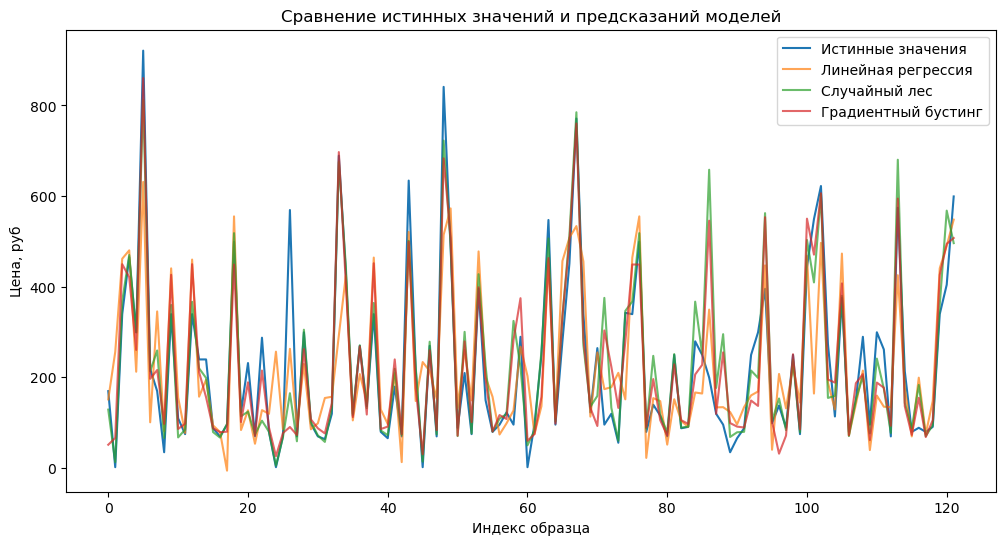

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Линейная регрессия
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Случайный лес
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train, y_train)

# Градиентный бустинг
gb_reg = GradientBoostingRegressor(random_state=42)
gb_reg.fit(X_train, y_train)

# Предсказания на тестовых данных
y_pred_lin = lin_reg.predict(X_test)
y_pred_rf = rf_reg.predict(X_test)
y_pred_gb = gb_reg.predict(X_test)

# Оценка качества моделей
mse_lin = mean_squared_error(y_test, y_pred_lin)
mse_rf = mean_squared_error(y_test, y_pred_rf)
mse_gb = mean_squared_error(y_test, y_pred_gb)

print(f"Среднеквадратическая ошибка (Линейная регрессия): {mse_lin}")
print(f"Среднеквадратическая ошибка (Случайный лес): {mse_rf}")
print(f"Среднеквадратическая ошибка (Градиентный бустинг): {mse_gb}")

# Визуализация предсказаний
plt.figure(figsize=(12, 6))

plt.plot(y_test.values, label='Истинные значения')
plt.plot(y_pred_lin, label='Линейная регрессия', alpha=0.7)
plt.plot(y_pred_rf, label='Случайный лес', alpha=0.7)
plt.plot(y_pred_gb, label='Градиентный бустинг', alpha=0.7)

plt.legend()
plt.title('Сравнение истинных значений и предсказаний моделей')
plt.xlabel('Индекс образца')
plt.ylabel('Цена, руб')
plt.show()

Результат внедрения этой переменной очевиден, Среднеквадратическая ошибка для моделей значительно уменьшилась. Затем я подбирала подходящий параметр для категории люкс и число 300 сильнее всего снижает ошибку.

В результате машинного обучения я признаю наиболее подходящей последнюю версию модели случайного леса. Практическим применением этой модели может быть ситуация когда продавец косметики решается выйти на рынок и ему нужно подобрать наиболее подходящюю цену для его косметического продукта по уходу за лицом. Вписывая различные параметры , бовавляя и изменяя их он может найти те свойства которые принесут ему наибольшую прибыль. (производитель то знает сколько будет стоить внедрить лифтинг эффект в пролдукт, а с моей моделью он будет знать сколько профита он с этого получит)

### Вывод

В рамках этого исследования я посмотрела механизмы ценообразования. Такжея посмотрела отличительные признаки товаров для ухода за лицом. Провела EDA, сделала машинное обучение.